<a href="https://www.kaggle.com/code/anshulsinghgehlot/data-preprocess?scriptVersionId=103142946" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Executive summary**
##### **LendingClub** - LendingClub is a peer-to-peer lending company headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, and to offer loan trading on a secondary market. Wikipedia
##### Majority of internal and external stakeholders from financial industry, or otherwise would have most likely come across words like Risk Score, Credit Score and Credit Rating. These terms have been widely worked upon by individual, a startup, a small business unit, or treasury heads as means for measuring Credit Risk.
##### Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank’s risk-adjusted rate of return by maintaining credit risk exposure within acceptable parameters. Banks need to manage the credit risk inherent in the entire portfolio as well as the risk in individual credits or transactions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
sns.set()

In [3]:
loandata = pd.read_csv("../input/lendingclub-loan/accepted_2007_to_2018Q4.csv", low_memory = False)

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows =None
pd.options.display.max_info_columns = 200

In [5]:
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

## **Data Description**

##### In this project we will be using the data made available by kaggle, please find the below the mentioned descriptive w.r.t the data.
##### 1. Dataset is related to the consumer loan issued by the LendingClub for the year 2007-2018.
##### 2. The raw data includes information on over 20 lacs personal/consumer loans issued for the above mentioned period.
##### 3. Their are 150 features, including the current loan status and various attributes related to the borrowers and their payment behaviour.

In [6]:
loandata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

In [7]:
loandata.describe(include="all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,2260701,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2260668,2.260668e+06,2.260668e+06,2260668,2260668,2093699,2113761,2260668,2.260664e+06,2260668,2260668,2260668,2260668,2260668,126067,2260668,2237343,2260667,2260668,2.258957e+06,2.260639e+06,2260639,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2260668,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2258241,2.260668e+06,915358,2260596,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,2260668,1.207100e+05,120706.000000,115730,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,2260668,10917,10917,10917,10917.0

# **Data Cleaning**

## **Preliminary Data Exploration**

##### Initial data exploration reveals the following:
##### 1. _____ features with more then 80% of the missing values. Given the high proportion of the missing values, any technique to ampute them will most likely will result in an inaccurate result.
##### 2. Certain static features not related to the credit risk eg. 'id', 'member_id', 'url', 'desc'
##### 3. Other forward looking features that are expected to be populated only once the borrower has defaulted, eg. 'recoveries', 'collection_recovery_fee',  'next_pymnt_d', 'mths_since_last_record' etc. Since, objective here is to predict future probability of default, having such features in the model will be counterintutive, as these will no be observed untill the default event has occured.
##### 4. Certain features have redundant value eg. 'title', 'zip_code'
##### 5. Some of the features in the  

'fico_range_low', 'fico_range_high', 'last_fico_range_high', 'last_fico_range_low',

'annual_inc_joint', 'dti_joint', 'verification_status_joint'

In [7]:
loandata.columns.values[115:128]

array(['revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog'], dtype=object)

In [8]:
loandata.drop(loandata.columns.values[115:128], inplace=True, axis=1)

In [9]:
loandata.drop(loandata.columns.values[116:130], inplace=True, axis=1)

In [10]:
loandata.drop(loandata.columns.values[118: ], inplace=True, axis=1)

In [11]:
loandata.drop(columns=['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'fico_range_low', 'fico_range_high', 'recoveries',
                       'collection_recovery_fee', 'last_fico_range_high', 'last_fico_range_low', 'next_pymnt_d', 'mths_since_last_record', 'annual_inc_joint', 
                       'dti_joint', 'verification_status_joint'], inplace=True)

In [12]:
loandata.isna().sum()

loan_amnt                              33
funded_amnt                            33
funded_amnt_inv                        33
term                                   33
int_rate                               33
installment                            33
grade                                  33
sub_grade                              33
emp_title                          167002
emp_length                         146940
home_ownership                         33
annual_inc                             37
verification_status                    33
issue_d                                33
loan_status                            33
pymnt_plan                             33
purpose                                33
addr_state                             33
dti                                  1744
delinq_2yrs                            62
earliest_cr_line                       62
inq_last_6mths                         63
mths_since_last_delinq            1158535
open_acc                          

In [14]:
naval = loandata.isnull().mean()
print(naval[naval>0.8])

Series([], dtype: float64)


In [13]:
loandata.isnull().mean()

loan_amnt                         0.000015
funded_amnt                       0.000015
funded_amnt_inv                   0.000015
term                              0.000015
int_rate                          0.000015
installment                       0.000015
grade                             0.000015
sub_grade                         0.000015
emp_title                         0.073872
emp_length                        0.064998
home_ownership                    0.000015
annual_inc                        0.000016
verification_status               0.000015
issue_d                           0.000015
loan_status                       0.000015
pymnt_plan                        0.000015
purpose                           0.000015
addr_state                        0.000015
dti                               0.000771
delinq_2yrs                       0.000027
earliest_cr_line                  0.000027
inq_last_6mths                    0.000028
mths_since_last_delinq            0.512467
open_acc   

<AxesSubplot:xlabel='application_type', ylabel='count'>

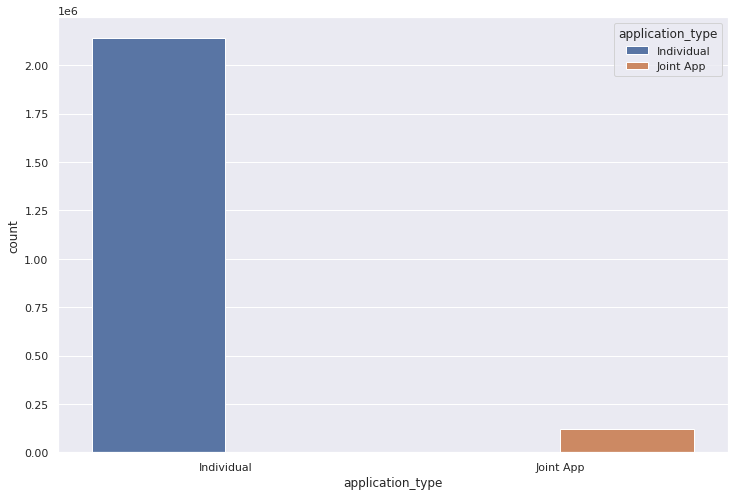

In [7]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.countplot(x='application_type', data=loandata, hue='application_type')

In [ ]:
loan_application_comments = pd.DataFrame(loandata["desc"].unique())

In [ ]:
loan_application_comments.to_csv("loan_application_comments.csv", index=False)

In [14]:
loandata['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [15]:
mapping_dict = {
    'emp_length': {
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'nan': 0,
    }
}

loandata.replace(mapping_dict, inplace=True)

In [16]:
def date_columns(df, column):
    today_date = pd.to_datetime('2021-09-18')
    df[column] = pd.to_datetime(df[column],errors='ignore', format = "%b-%Y")
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    df.drop(columns = [column], inplace = True)

In [17]:
date_columns(loandata, 'earliest_cr_line')
date_columns(loandata, 'issue_d')
date_columns(loandata, 'last_pymnt_d')
date_columns(loandata, 'last_credit_pull_d')

In [18]:
loandata['term'] = pd.to_numeric(loandata['term'].str.replace(' months', ''))

In [19]:
loandata["mths_since_last_major_derog"].fillna(value=0, inplace=True)

In [20]:
loandata["mths_since_last_delinq"].fillna(value=0, inplace=True)

In [21]:
loandata["mths_since_recent_revol_delinq"].fillna(value=0, inplace=True)

In [22]:
loandata["mths_since_recent_inq"].fillna(value=0, inplace=True)

In [23]:
loandata["mths_since_recent_bc_dlq"].fillna(value=0, inplace=True)

In [24]:
loandata["mths_since_recent_bc"].fillna(value=0, inplace=True)

In [25]:
loandata["inq_last_12m"].fillna(value=0, inplace=True)

In [26]:
loandata["inq_fi"].fillna(value=0, inplace=True)

In [27]:
loandata["open_rv_24m"].fillna(value=0, inplace=True)

In [28]:
loandata["open_rv_12m"].fillna(value=0, inplace=True)

In [29]:
loandata["open_acc_6m"].fillna(value=0, inplace=True)

In [30]:
loandata["open_il_12m"].fillna(value=0, inplace=True)

In [31]:
loandata["open_il_24m"].fillna(value=0, inplace=True)

In [32]:
loandata["open_act_il"].fillna(value=0, inplace=True)

In [33]:
loandata["mths_since_rcnt_il"].fillna(value=0, inplace=True)

In [34]:
loandata["all_util"].fillna(value=0, inplace=True)

In [35]:
loandata["il_util"].fillna(value=loandata["il_util"].mean(), inplace=True)

In [36]:
loandata["total_cu_tl"].fillna(value=0, inplace=True)

In [37]:
loandata["total_bal_il"].fillna(value=loandata["total_rec_prncp"], inplace=True)

In [64]:
loandata["max_bal_bc"].fillna(value=0, inplace=True)

In [62]:
ldmax_bal = loandata["max_bal_bc"][loandata["max_bal_bc"]<30000]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_bal_bc', ylabel='Density'>

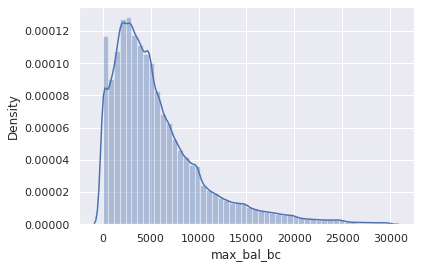

In [63]:
sns.distplot(ldmax_bal)

In [65]:
loandata.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,leadman,10.0,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,122.67,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,218.0,70.0,33.0,31.0
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,Engineer,10.0,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,926.35,0.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,262.0,70.0,64.0,31.0
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,truck driver,10.0,MORTGAGE,63000.0,Not Verified,Fully Paid,n,home_improvement,IL,10.78,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,15813.30,0.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,10.0,0.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,254.0,70.0,52.0,31.0
3,35000.0,35000.0,35000.0,60.0,14.85,829.90,C,C5,Information Systems Officer,10.0,MORTGAGE,110000.0,Source Verified,Current,n,debt_consolidation,NJ,17.06,0.0,0.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,829.90,0.0,0.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,157.0,70.0,32.0,31.0
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,Contract Specialist,3.0,MORTGAGE,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.0

In [70]:
loandata = loandata[loandata["loan_status"]!="Current"]

In [71]:
loandata['good_bad_loan'] = np.where(loandata['loan_status'].isin(['Charged Off', 'In Grace Period',
                                                                     'Late (31-120 days)', 'Late (16-30 days)', 
                                                                     'Default']), 0, 1)
loandata.drop(columns=['loan_status'], axis=1, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
df1 = loandata[loandata["loan_status"]!="Current"]

In [67]:
df1['good_bad_loan'] = np.where(df1['loan_status'].isin(['Charged Off', 'In Grace Period',
                                                                     'Late (31-120 days)', 'Late (16-30 days)', 
                                                                     'Default']), 0, 1)
df1.drop(columns=['loan_status'], axis=1, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,good_bad_loan
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,leadman,10.0,MORTGAGE,55000.0,Not Verified,n,debt_consolidation,PA,5.91,0.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,122.67,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,218.0,70.0,33.0,31.0,1
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,Engineer,10.0,MORTGAGE,65000.0,Not Verified,n,small_business,SD,16.06,1.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,926.35,0.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,262.0,70.0,64.0,31.0,1
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,truck driver,10.0,MORTGAGE,63000.0,Not Verified,n,home_improvement,IL,10.78,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,15813.30,0.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,10.0,0.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,254.0,70.0,52.0,31.0,1
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,Contract Specialist,3.0,MORTGAGE,104433.0,Source Verified,n,major_purchase,PA,25.37,1.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,10128.96,0.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,280.0,70.0,63.0,43.0,1
5,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,Veterinary Tecnician,4.0,RENT,34000.0,Source Verified,n,debt_consolidation,GA,10.20,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,7653.56,0.0,0.0,1.0,Individual,0.0,0.0,12798.0,0.0,1.0,0.0,0.0

In [69]:
df1.to_csv("D:\datascience\lendingclub\preprocessed.csv", index = False)

KeyboardInterrupt: 

In [ ]:
df1 = pd.read_csv("df1_preprocessed.csv", low_memory = False)

<AxesSubplot:xlabel='good_bad_loan', ylabel='count'>

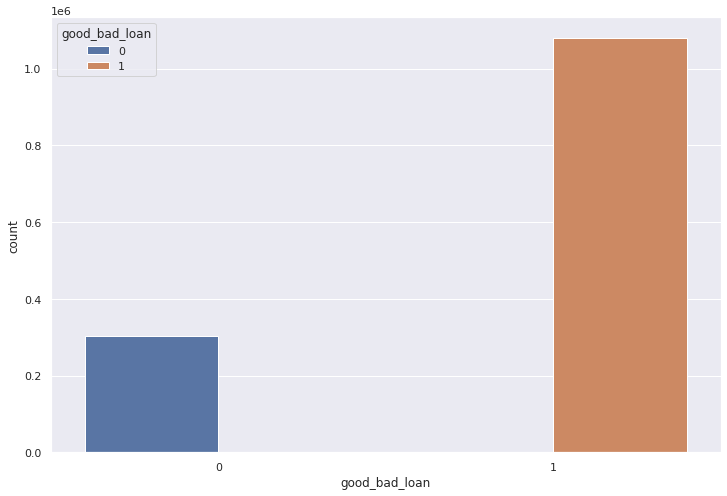

In [74]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.countplot(x='good_bad_loan', data=df1, hue='good_bad_loan')

# Declaring the dependent variable

In [ ]:
from scipy.stats import chi2_contingency

chi2_check = {}

for column in loandata_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y, loandata_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p,10))

chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

In [ ]:
F_statistic, p_values = f_classif(loandata_num, y)

In [ ]:
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': loandata_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

In [ ]:
def dummy_creation(df, column_list):
    df_dummy = []
    for column in column_list:
        df_dummy.append(pd.get_dummies(df[column], prefix = column, prefix_sep = ':'))
    df_dummy = pd.concat(df_dummy, axis=1)
    # df = pd.concat([df, df_dummy], axis=1)
    return df_dummy

In [ ]:
loandata_cat_dummy = dummy_creation(loandata_cat, loandata_cat.columns.values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
import statsmodels.api as sm

In [ ]:
X1_train = sm.add_constant(X_train)
reg_log = sm.Logit(y_train, X1_train)
result_log = reg_log.fit()

In [ ]:
result_log.summary()

In [ ]:
result_log = reg_log.fit()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(max_iter=1000, class_weight = 'balanced')

In [ ]:
log_model.fit(X_train, y_train)

In [ ]:
type(log_model.coef_)

In [ ]:
log_model.coef_.shape

In [ ]:
X_train.columns.values

In [ ]:
X_train.info(all)

In [ ]:
pd_model = pd.DataFrame(data=X_train.columns.values)

In [ ]:
pd_model.columns.values[0]

In [ ]:
pd_model["coefficient"] = log_model.coef_.transpose()

In [ ]:
pd_model[0][0]

In [ ]:
log_model.coef_.shape

In [ ]:
predictions = log_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
y_test.head(20)

In [ ]:
for i in predictions:
    print (i)

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
final_df.shape

In [ ]:
y.shape

In [ ]:
type(y)

In [ ]:
discvar = final_df.select_dtypes(include='object').copy()

In [ ]:
column_list = discvar.columns.values

In [ ]:
column_list

In [ ]:
final_df.to_csv("final_df.csv", index=False)

In [ ]:
final_df = pd.read_csv("final_df.csv")

In [ ]:
final_df.head()

In [ ]:
final_df.info()